In [1]:
a="jai ganesha"
a

'jai ganesha'

## ConvXGB: Image Classififcation Using XGBOOST by extracting features using CNN

In [2]:
import pandas as pd
import tensorflow as tf
from tensorflow.keras import models, layers
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [3]:
#from tensorflow.keras.utils import to_categorical
import os
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras.applications.mobilenet_v2 import preprocess_input

In [4]:
import numpy as np 
import matplotlib.pyplot as plt
import glob
#import cv2

from sklearn.model_selection import train_test_split

In [5]:
from keras.models import Model, Sequential
from keras.layers import Dense, Flatten, Conv2D, MaxPooling2D
import os
import seaborn as sns

In [6]:
IMAGE_SIZE = 512
BATCH_SIZE = 32
CHANNELS=3

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


# Reading images from directory

In [8]:
dataset = tf.keras.preprocessing.image_dataset_from_directory(
"stomach6000",
    shuffle=True,
    image_size = (IMAGE_SIZE,IMAGE_SIZE),
    batch_size = BATCH_SIZE

)

Found 3063 files belonging to 2 classes.


In [47]:
class_names = dataset.class_names
class_names

['NOTUM', 'TUM']

In [9]:
len(dataset)

96

In [49]:
for image_batch, label_batch in dataset.take(1):
    print(image_batch.shape)
    print(label_batch.numpy())

(32, 512, 512, 3)
[1 1 0 1 1 1 1 0 1 1 0 1 1 0 0 0 0 0 1 1 0 0 0 1 0 1 1 1 0 1 1 0]


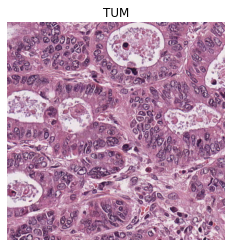

In [50]:
for image_batch, label_batch in dataset.take(1):
    plt.imshow(image_batch[0].numpy().astype("uint8"))
    plt.title(class_names[label_batch[0]])
    plt.axis("off")
   

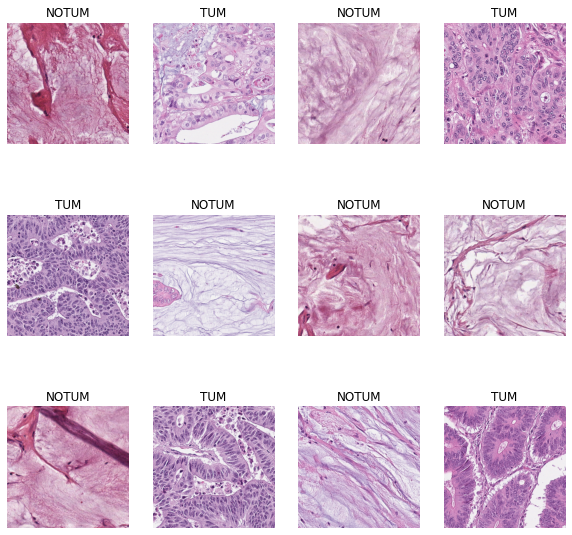

In [51]:
plt.figure(figsize=(10,10))
for image_batch, label_batch in dataset.take(1):
    for i in range(12):
        ax = plt.subplot(3,4,i+1)
        plt.imshow(image_batch[i].numpy().astype("uint8"))
        plt.title(class_names[label_batch[i]])
        plt.axis("off")

In [ ]:
#DIRECTORY = r"/content/gdrive/MyDrive/stomachs/stomachs"
#CATEGORIES = ["NOTUM", "TUM"]

In [10]:
DIRECTORY = "C:/Users/91970/stomach6000"
CATEGORIES = ["NOTUM", "TUM"]

In [11]:
print("[INFO] loading images...")

data = []
labels = []
for category in CATEGORIES:
    path = os.path.join(DIRECTORY, category)
    for img in os.listdir(path):
    	img_path = os.path.join(path, img)
    	image = load_img(img_path, target_size=(512, 512))
    	image = img_to_array(image)
    	image = preprocess_input(image)

    	data.append(image)
    	labels.append(category)

[INFO] loading images...


In [12]:
lb = LabelBinarizer()
labels = lb.fit_transform(labels)
labels = to_categorical(labels)

In [13]:
data = np.array(data, dtype="float32")
labels = np.array(labels)

In [14]:
len(labels)

3063

In [15]:
labels.shape[0]

3063

In [16]:
labels

array([[1., 0.],
       [1., 0.],
       [1., 0.],
       ...,
       [0., 1.],
       [0., 1.],
       [0., 1.]], dtype=float32)

In [17]:
first_tuple_elements = [a_tuple[0] for a_tuple in labels]
print(first_tuple_elements)

[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0,

In [18]:
first_tuple_elements = np.array(first_tuple_elements)

In [19]:
(trainX, testX, trainY, testY) = train_test_split(data, first_tuple_elements,
	test_size=0.20, stratify=labels, random_state=42)

In [20]:
len(trainX),len(testX),len(trainY),len(testY)

(2450, 613, 2450, 613)

In [21]:
trainX.shape

(2450, 512, 512, 3)

In [22]:
testX.shape

(613, 512, 512, 3)

In [23]:
trainY.shape

(2450,)

In [24]:
testY.shape

(613,)

In [22]:
testY

array([1., 0., 0., 0., 0., 1., 0., 0., 1., 0., 0., 1., 1., 0., 1., 1., 0.,
       1., 1., 1., 0., 0., 1., 0., 1., 1., 1., 0., 1., 1., 1., 1., 1., 0.,
       0., 0., 1., 1., 0., 1., 1., 0., 0., 1., 0., 0., 1., 0., 0., 0., 0.,
       1., 1., 1., 0., 0., 1., 0., 1., 0., 0., 1., 1., 1., 1., 1., 0., 1.,
       1., 0., 1., 1., 0., 0., 0., 1., 0., 0., 0., 0., 0., 1., 1., 1., 1.,
       0., 1., 0., 1., 1., 1., 0., 1., 0., 0., 0., 0., 0., 0., 1., 1., 1.,
       0., 0., 1., 1., 0., 0., 0., 0., 1., 0., 1., 0., 0., 1., 0., 0., 0.,
       0., 0., 1., 1., 0., 1., 0., 0., 0., 0., 0., 1., 0., 0., 0., 1., 1.,
       1., 1., 0., 1., 0., 0., 0., 1.], dtype=float32)

### Preprocessing: scale images

In [25]:
resize_and_rescale = tf.keras.Sequential([
  layers.experimental.preprocessing.Resizing(IMAGE_SIZE, IMAGE_SIZE),
  layers.experimental.preprocessing.Rescaling(1./255),
])

### Data Augmentation  .

In [ ]:
data_augmentation = tf.keras.Sequential([
  layers.experimental.preprocessing.RandomFlip("horizontal_and_vertical"),
  layers.experimental.preprocessing.RandomRotation(0.2),
])

## Build convolutional neural network and train it

In [26]:
input_shape = (BATCH_SIZE, IMAGE_SIZE, IMAGE_SIZE, CHANNELS)
n_classes = 3

cnn_model = models.Sequential([
    resize_and_rescale,
    layers.Conv2D(32, kernel_size = (3,3), activation='relu', input_shape=input_shape),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64,  kernel_size = (3,3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64,  kernel_size = (3,3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    #layers.Dense(64, activation='relu'),
    #layers.Dense(n_classes, activation='softmax'),
])

cnn_model.build(input_shape=input_shape)

In [27]:
cnn_model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential (Sequential)     (32, 512, 512, 3)         0         
                                                                 
 conv2d (Conv2D)             (32, 510, 510, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (32, 255, 255, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (32, 253, 253, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (32, 126, 126, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (32, 124, 124, 64)       

In [28]:
cnn_model.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    metrics=['accuracy']
)

####  Features are extracted (class labels) from the trained CNN model

In [29]:
#Now, let us use features from convolutional network

X_training_features=cnn_model.predict(trainX)

In [30]:
X_training_features.shape

(2450, 2304)

In [31]:
X_test_features = cnn_model.predict(testX)

In [32]:
X_test_features.shape

(613, 2304)

## The main task in this layer is to predict the class using XGBoost

In [147]:
#XGBOOST

import xgboost as xgb
model = xgb.XGBClassifier(base_score=0.8,
              learning_rate=0.2, max_delta_step=2, max_depth=8,
              min_child_weight=3, monotone_constraints='()',
              n_estimators=10, n_jobs=4, num_parallel_tree=1, predictor='auto',
              random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
              subsample=1, tree_method='exact', validate_parameters=1,
              verbosity=None)

## Passing X_training_features extracted from the CNN_model to XGBoost fit method for training

In [148]:
eval_set1 = [(X_training_features, trainY), (X_test_features, testY)]
eval_set = [ X_test_features, testY]


model.fit(X_training_features, trainY, eval_metric=["error", "logloss", "rmse", "mae"], eval_set=eval_set1, verbose=False)



C:\Users\91970\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


XGBClassifier(base_score=0.8, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.2, max_delta_step=2,
              max_depth=8, min_child_weight=3, missing=nan,
              monotone_constraints='()', n_estimators=10, n_jobs=4,
              num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

## Prediction

In [149]:
from sklearn.metrics import accuracy_score, mean_squared_error

In [150]:
#Print overall accuracy Test 
from sklearn import metrics
#Now predict using the trained RF model. 
prediction_test= model.predict(X_test_features)
#Now predict using the trained RF model. 
prediction_train = model.predict(X_training_features)

xgbaccuracy=  metrics.accuracy_score(prediction_test , testY)

print ("NO. of Training Samples = " , len(X_training_features) ,"Accuracy Train = ", metrics.accuracy_score(prediction_train , trainY))
print ("NO. of Test Samples = " , len(X_test_features) , "Accuracy Test = ", metrics.accuracy_score(prediction_test , testY))

dic = {'NO. of Training Samples' : [len(X_training_features)],
       'Accuracy Train'         : [metrics.accuracy_score(prediction_train, trainY)],
       'NO. of Test Samples' : [len(X_test_features)],
       'Accuracy Test'         : [metrics.accuracy_score(prediction_test, testY)]}
      
                                  
df = pd.DataFrame(dic)    
df                                 


NO. of Training Samples =  2450 Accuracy Train =  0.9987755102040816
NO. of Test Samples =  613 Accuracy Test =  0.9086460032626428


,NO. of Training Samples,Accuracy Train,NO. of Test Samples,Accuracy Test
0,2450,0.998776,613,0.908646


In [151]:
from sklearn.metrics import confusion_matrix , classification_report


In [152]:
print('*************** Evaluation on Test Data ConvXGB***************')
print('Accuracy Score: ', metrics.accuracy_score(prediction_test, testY))
print(classification_report(testY, prediction_test))
print('--------------------------------------------------------')
print("")
print('*************** Evaluation on Training Data ConvXGB ***************')
print('Accuracy Score: ', metrics.accuracy_score(prediction_train, trainY))
print(classification_report(trainY, prediction_train))
print('--------------------------------------------------------')
print("")

*************** Evaluation on Test Data ConvXGB***************
Accuracy Score:  0.9086460032626428
              precision    recall  f1-score   support

         0.0       0.97      0.85      0.90       305
         1.0       0.86      0.97      0.91       308

    accuracy                           0.91       613
   macro avg       0.92      0.91      0.91       613
weighted avg       0.91      0.91      0.91       613

--------------------------------------------------------

*************** Evaluation on Training Data ConvXGB ***************
Accuracy Score:  0.9987755102040816
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      1219
         1.0       1.00      1.00      1.00      1231

    accuracy                           1.00      2450
   macro avg       1.00      1.00      1.00      2450
weighted avg       1.00      1.00      1.00      2450

--------------------------------------------------------



## Confusion Matrix

<AxesSubplot:>

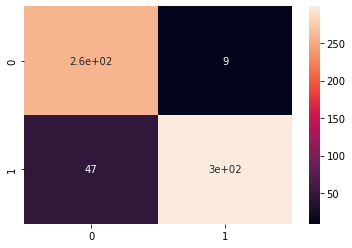

In [153]:
cm = confusion_matrix(prediction_test, testY)
#print(cm)
sns.heatmap(cm, annot=True)

In [154]:
accuracy = accuracy_score(testY, prediction_test)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

results = model.evals_result()
print(results)
results['validation_0']['error']
epochs = len(results["validation_0"]["error"])
x_axis = range(0, epochs)

Accuracy: 90.86%
{'validation_0': OrderedDict([('error', [0.497551, 0.497551, 0.497551, 0.139184, 0.051429, 0.022449, 0.01102, 0.006531, 0.002857, 0.001224]), ('logloss', [0.766182, 0.632484, 0.51497, 0.414053, 0.33831, 0.28178, 0.238311, 0.203466, 0.175336, 0.152093]), ('rmse', [0.535628, 0.481327, 0.422093, 0.361454, 0.309693, 0.26775, 0.233603, 0.205166, 0.181352, 0.161448]), ('mae', [0.461107, 0.416149, 0.366721, 0.315311, 0.270573, 0.233714, 0.203051, 0.176979, 0.155105, 0.136335])]), 'validation_1': OrderedDict([('error', [0.497553, 0.497553, 0.497553, 0.230016, 0.185971, 0.153344, 0.137031, 0.117455, 0.101142, 0.091354]), ('logloss', [0.789407, 0.68644, 0.592784, 0.508133, 0.451249, 0.403582, 0.364742, 0.3342, 0.308019, 0.287818]), ('rmse', [0.542951, 0.502426, 0.458897, 0.414276, 0.381744, 0.354012, 0.331112, 0.312913, 0.297272, 0.285694]), ('mae', [0.468828, 0.436593, 0.398166, 0.357055, 0.325284, 0.296717, 0.271739, 0.25052, 0.231503, 0.215754])])}


In [155]:
print(results['validation_0']['logloss'])

[0.766182, 0.632484, 0.51497, 0.414053, 0.33831, 0.28178, 0.238311, 0.203466, 0.175336, 0.152093]


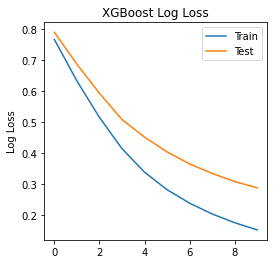

In [156]:
# plot log loss
from matplotlib import pyplot
fig, ax = pyplot.subplots(figsize=(4,4))
ax.plot(x_axis, results["validation_0"]["logloss"], label="Train")
ax.plot(x_axis, results["validation_1"]["logloss"], label="Test")
ax.legend()
pyplot.ylabel("Log Loss")
pyplot.title("XGBoost Log Loss")
pyplot.show()

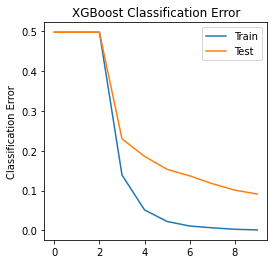

In [157]:
# plot classification error
fig, ax = pyplot.subplots(figsize=(4,4))
ax.plot(x_axis, results["validation_0"]["error"], label="Train")
ax.plot(x_axis, results["validation_1"]["error"], label="Test")
ax.legend()
pyplot.ylabel("Classification Error")
pyplot.title("XGBoost Classification Error")
pyplot.show()

## Hyper Parameter Optimization

In [127]:
## Hyper Parameter Optimization

#params={
# "learning_rate"    : [0.05, 0.10, 0.15, 0.20, 0.25, 0.30 ] ,
# "max_depth"        : [ 3, 4, 5, 6, 8, 10, 12, 15],
 #"min_child_weight" : [ 1, 3, 5, 7 ],
 #"gamma"            : [ 0.0, 0.1, 0.2 , 0.3, 0.4 ],
 #"colsample_bytree" : [ 0.3, 0.4, 0.5 , 0.7 ]
    
#}

params={
    
"max_features" : ['auto', 'sqrt'],
"max_depth"        : [ 3, 4, 5, 6, 8, 10, 12, 15],
"min_samples_split" : [2, 5, 10],
"min_samples_leaf" : [1, 2, 4],
"bootstrap" : [True, False]

}

In [128]:
## Hyperparameter optimization using RandomizedSearchCV
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV

In [129]:
#classifier=xgb.XGBClassifier()
classifier = RandomForestClassifier()

In [130]:
random_search=RandomizedSearchCV(classifier,param_distributions=params,n_iter=5,scoring='roc_auc',n_jobs=-1,cv=5,verbose=3)

In [131]:
random_search.fit(X_training_features, trainY)

Fitting 5 folds for each of 5 candidates, totalling 25 fits


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=5,
                   n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [3, 4, 5, 6, 8, 10, 12,
                                                      15],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10]},
                   scoring='roc_auc', verbose=3)

In [132]:
random_search.best_estimator_

RandomForestClassifier(max_depth=15, min_samples_split=5)

In [133]:
random_search.best_params_

{'min_samples_split': 5,
 'min_samples_leaf': 1,
 'max_features': 'auto',
 'max_depth': 15,
 'bootstrap': True}


## Passing X_training_features extracted from the CNN_model to RandomForest,LGBM and CatBoost model fusing it method for training

## RF

In [158]:
from sklearn.ensemble import RandomForestClassifier
RFmodel = RandomForestClassifier(n_estimators=100,min_samples_split= 5,min_samples_leaf= 1,max_features= 'auto',max_depth= 15,
 bootstrap= True)

In [159]:
RFmodel.fit(X_training_features, trainY)

RandomForestClassifier(max_depth=15, min_samples_split=5)

In [160]:
#Print overall accuracy Test 
from sklearn import metrics
#Now predict using the trained RF model. 
prediction_testRF= RFmodel.predict(X_test_features)
#Now predict using the trained RF model. 
prediction_trainRF = RFmodel.predict(X_training_features)

In [161]:
print('*************** Evaluation on Test Data ConvRF***************')
print('Accuracy Score: ', metrics.accuracy_score(prediction_testRF, testY))
print(classification_report(testY, prediction_testRF))
print('--------------------------------------------------------')
print("")
print('*************** Evaluation on Training Data ConvRF***************')
print('Accuracy Score: ', metrics.accuracy_score(prediction_trainRF, trainY))
print(classification_report(trainY, prediction_trainRF))
print('--------------------------------------------------------')
print("")

*************** Evaluation on Test Data ConvRF***************
Accuracy Score:  0.9314845024469821
              precision    recall  f1-score   support

         0.0       0.95      0.91      0.93       305
         1.0       0.92      0.95      0.93       308

    accuracy                           0.93       613
   macro avg       0.93      0.93      0.93       613
weighted avg       0.93      0.93      0.93       613

--------------------------------------------------------

*************** Evaluation on Training Data ConvRF***************
Accuracy Score:  1.0
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      1219
         1.0       1.00      1.00      1.00      1231

    accuracy                           1.00      2450
   macro avg       1.00      1.00      1.00      2450
weighted avg       1.00      1.00      1.00      2450

--------------------------------------------------------



<AxesSubplot:>

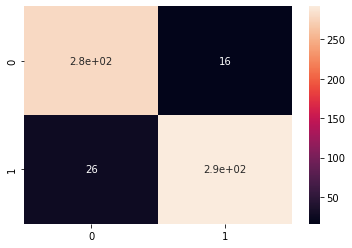

In [162]:
cmRF = confusion_matrix(prediction_testRF, testY)
#print(cm)
sns.heatmap(cmRF, annot=True)

In [163]:
RF = RFmodel.score(X_test_features, testY)

In [164]:
RF

0.9314845024469821

## LightGBM

In [183]:
from lightgbm import LGBMClassifier
LGBMmodel = LGBMClassifier()

In [186]:
LGBMmodel.fit(X_training_features, trainY,eval_metric=["error", "logloss", "rmse", "mae"], eval_set = eval_set1, verbose=False)

C:\Users\91970\anaconda3\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


LGBMClassifier()

In [187]:
#Print overall accuracy Test 
from sklearn import metrics
#Now predict using the trained RF model. 
prediction_testLGBM= LGBMmodel.predict(X_test_features)
#Now predict using the trained RF model. 
prediction_trainLGBM = LGBMmodel.predict(X_training_features)

In [188]:
print('*************** Evaluation on Test Data ConvLGBM ***************')
print('Accuracy Score: ', metrics.accuracy_score(prediction_testLGBM, testY))
print(classification_report(testY, prediction_testLGBM))
print('--------------------------------------------------------')
print("")
print('*************** Evaluation on Training Data ConvLGBM ***************')
print('Accuracy Score: ', metrics.accuracy_score(prediction_trainLGBM, trainY))
print(classification_report(trainY, prediction_trainLGBM))
print('--------------------------------------------------------')
print("")

*************** Evaluation on Test Data ConvLGBM ***************
Accuracy Score:  0.9429037520391517
              precision    recall  f1-score   support

         0.0       0.96      0.93      0.94       305
         1.0       0.93      0.96      0.94       308

    accuracy                           0.94       613
   macro avg       0.94      0.94      0.94       613
weighted avg       0.94      0.94      0.94       613

--------------------------------------------------------

*************** Evaluation on Training Data ConvLGBM ***************
Accuracy Score:  1.0
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      1219
         1.0       1.00      1.00      1.00      1231

    accuracy                           1.00      2450
   macro avg       1.00      1.00      1.00      2450
weighted avg       1.00      1.00      1.00      2450

--------------------------------------------------------



<AxesSubplot:>

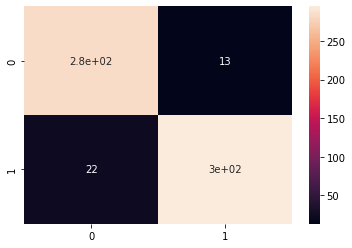

In [189]:
cmLGBM = confusion_matrix(prediction_testLGBM, testY)
#print(cm)
sns.heatmap(cmLGBM, annot=True)

In [190]:
LGBM = LGBMmodel.score(X_test_features, testY)

In [191]:
LGBM

0.9429037520391517

In [ ]:
LGBMresults = LGBMmodel.evals_result()
print(LGBMresults)
LGBMresults['validation_0']['error']
LGBMepochs = len(LGBMresults["validation_0"]["error"])
LGBMx_axis = range(0, LGBMepochs)


# plot log loss
from matplotlib import pyplot
fig, ax = pyplot.subplots(figsize=(4,4))
ax.plot(LGBMx_axis, LGBMresults["validation_0"]["logloss"], label="Train")
ax.plot(LGBMx_axis, LGBMresults["validation_1"]["logloss"], label="Test")
ax.legend()
pyplot.ylabel("Log Loss")
pyplot.title("ConvLGBM Log Loss")
pyplot.show()


# plot log loss
from matplotlib import pyplot
fig, ax = pyplot.subplots(figsize=(4,4))
ax.plot(LGBMx_axis, LGBMresults["validation_0"]["logloss"], label="Train")
ax.plot(LGBMx_axis, LGBMresults["validation_1"]["logloss"], label="Test")
ax.legend()
pyplot.ylabel("Log Loss")
pyplot.title("ConvLGBM Log Loss")
pyplot.show()

## catBoost

In [193]:
from catboost import CatBoostClassifier
CBmodel = CatBoostClassifier()

In [ ]:
CBmodel.fit(X_training_features, trainY)

In [196]:
#Print overall accuracy Test 
from sklearn import metrics
#Now predict using the trained RF model. 
prediction_testCB= CBmodel.predict(X_test_features)
#Now predict using the trained RF model. 
prediction_trainCB = CBmodel.predict(X_training_features)

In [197]:
print('*************** Evaluation on Test Data ConvCatBoost ***************')
print('Accuracy Score: ', metrics.accuracy_score(prediction_testCB, testY))
print(classification_report(testY, prediction_testCB))
print('--------------------------------------------------------')
print("")
print('*************** Evaluation on Training Data ConvCatBoost***************')
print('Accuracy Score: ', metrics.accuracy_score(prediction_trainCB, trainY))
print(classification_report(trainY, prediction_trainCB))
print('--------------------------------------------------------')
print("")

*************** Evaluation on Test Data ConvCatBoost ***************
Accuracy Score:  0.9494290375203915
              precision    recall  f1-score   support

         0.0       0.97      0.93      0.95       305
         1.0       0.93      0.97      0.95       308

    accuracy                           0.95       613
   macro avg       0.95      0.95      0.95       613
weighted avg       0.95      0.95      0.95       613

--------------------------------------------------------

*************** Evaluation on Training Data ConvCatBoost***************
Accuracy Score:  1.0
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      1219
         1.0       1.00      1.00      1.00      1231

    accuracy                           1.00      2450
   macro avg       1.00      1.00      1.00      2450
weighted avg       1.00      1.00      1.00      2450

--------------------------------------------------------



<AxesSubplot:>

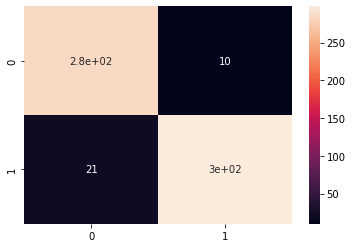

In [198]:
cmCB = confusion_matrix(prediction_testCB, testY)
#print(cm)
sns.heatmap(cmCB, annot=True)

In [199]:
CB = CBmodel.score(X_test_features, testY)

In [200]:
CB

0.9494290375203915

In [ ]:
CBresults = CBmodel.evals_result()
print(CBresults)
CBresults['validation_0']['error']
CBepochs = len(CBresults["validation_0"]["error"])
CBx_axis = range(0, CBepochs)


# plot log loss
from matplotlib import pyplot
fig, ax = pyplot.subplots(figsize=(4,4))
ax.plot(CBx_axis, CBresults["validation_0"]["logloss"], label="Train")
ax.plot(CBx_axis, CBresults["validation_1"]["logloss"], label="Test")
ax.legend()
pyplot.ylabel("Log Loss")
pyplot.title("ConvCatBoost Log Loss")
pyplot.show()


# plot log loss
from matplotlib import pyplot
fig, ax = pyplot.subplots(figsize=(4,4))
ax.plot(CBx_axis, CBresults["validation_0"]["logloss"], label="Train")
ax.plot(CBx_axis, CBresults["validation_1"]["logloss"], label="Test")
ax.legend()
pyplot.ylabel("Log Loss")
pyplot.title("ConvCatBoost Log Loss")
pyplot.show()

In [202]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

In [203]:
alg=['ConvXGB','ConvRF','ConvLGBM','ConvCatBoost']
acc=[xgbaccuracy,RF,LGBM,CB]

In [204]:
xpos = np.arange(len(alg))
xpos

array([0, 1, 2, 3])

No handles with labels found to put in legend.


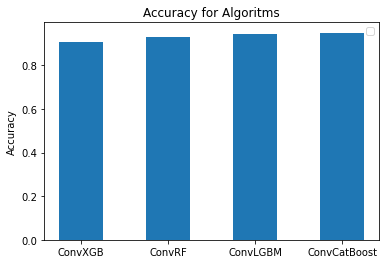

In [205]:
plt.bar(xpos,acc,width=0.5,linewidth=20)


plt.xticks(xpos,alg)
plt.ylabel("Accuracy")
plt.title('Accuracy for Algoritms')
plt.legend()

In [206]:
ConvXGB = xgb.XGBClassifier(base_score=0.8,
              learning_rate=0.2, max_delta_step=2, max_depth=8,
              min_child_weight=3, monotone_constraints='()',
              n_estimators=10, n_jobs=4, num_parallel_tree=1, predictor='auto',
              random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
              subsample=1, tree_method='exact', validate_parameters=1,
              verbosity=None)
ConvRF = RandomForestClassifier(n_estimators=100,min_samples_split= 5,min_samples_leaf= 1,max_features= 'auto',max_depth= 15,
 bootstrap= True)
ConvLGBM = LGBMClassifier(n_estimators=100,max_depth = 5)
ConvCB =  CatBoostClassifier()

In [207]:
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score,recall_score,f1_score

In [211]:
clfs = {
    'ConvXGB' : ConvXGB,
    'ConvRF' : ConvRF, 
    'ConvLGBM': ConvLGBM, 
    'ConvCatBOOST': ConvCB,
    
}

In [209]:
def train_classifier(clf,X_train,y_train,X_test,y_test):
    clf.fit(X_train,y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test,y_pred)
    precision = precision_score(y_test,y_pred)
    recall = recall_score(y_test,y_pred)
    fscore = f1_score(y_test,y_pred)
        
    return accuracy,precision,recall,fscore

In [212]:
accuracy_scores = []
precision_scores = []
recall_scores = []
f1_scores = []

for name,clf in clfs.items():
    
    current_accuracy,current_precision,current_recall,current_f1_score = train_classifier(clf, X_training_features,trainY,X_test_features,testY)
    
    print("For ",name)
    print("Accuracy - ",current_accuracy)
    print("Precision - ",current_precision)
    print("Recall - ",current_recall)
    print("f1_score - ",current_f1_score)
        
    accuracy_scores.append(current_accuracy)
    precision_scores.append(current_precision)
    recall_scores.append(current_recall)
    f1_scores.append(current_f1_score)

C:\Users\91970\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[20:55:26] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
For  ConvXGB
Accuracy -  0.9086460032626428
Precision -  0.8641618497109826
Recall -  0.9707792207792207
f1_score -  0.9143730886850153
For  ConvRF
Accuracy -  0.9380097879282219
Precision -  0.9299363057324841
Recall -  0.948051948051948
f1_score -  0.9389067524115756
For  ConvLGBM
Accuracy -  0.9363784665579119
Precision -  0.9216300940438872
Recall -  0.9545454545454546
f1_score -  0.937799043062201
Learning rate set to 0.015105
0:	learn: 0.6825887	total: 250ms	remaining: 4m 9s
1:	learn: 0.6708596	total: 488ms	remaining: 4m 3s
2:	learn: 0.6605553	total: 716ms	remaining: 3m 57s
3:	learn: 0.6504559	total: 943ms	remaining: 3m 54s
4:	learn: 0.6409593	total: 1.17s	remaining: 3m 53s
5

In [213]:
performance_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy':accuracy_scores,'Precision':precision_scores,'Recall':recall_scores,'F1score':f1_scores}).sort_values('Accuracy',ascending=False)
performance_df

,Algorithm,Accuracy,Precision,Recall,F1score
3,ConvCatBOOST,0.949429,0.934169,0.967532,0.950558
1,ConvRF,0.938010,0.929936,0.948052,0.938907
2,ConvLGBM,0.936378,0.921630,0.954545,0.937799
0,ConvXGB,0.908646,0.864162,0.970779,0.914373
